# READ and plot TMD data
# 1-13-2023

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
params = {'legend.fontsize': 'x-large', 
         'axes.labelcolor' : 'black',
         'legend.title_fontsize': 'x-large',
         'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':25,
         'ytick.labelsize':25,
         'xtick.major.size': 2}
plt.rcParams.update(params)

%matplotlib inline

In [156]:
# input csv, channel number, returns two numpy arrays for plotting
def get_sec(time_str):
    """Get seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def getTmdTemp(f):
    # returns index, time, temp1, temp2
    time = list()
    temp1 = list()
    temp2 = list()
    ind = list()
    d = list()
    
    with open(f, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file,delimiter = '\t')
        for ri, row in enumerate(csv_reader):
            # skip header
            if (ri > 7):
                
                # index
                iss = row.get('File Name:')
                ind.append(iss)
                dv = row.get(None)
                
                #print(dv[1])
                s = get_sec(dv[0])
                
                time.append(s)
                temp1.append(dv[1])
                temp2.append(dv[2])
                    
    time_v = np.double(np.array(time)) - np.double(time[0])
    temp1v = np.double(np.array(temp1))
    temp2v = np.double(np.array(temp2))
    indv = np.double(np.array(ind))    
    # remove rapidly changing temperatures that are unrealistic:
    dt1 = np.diff(temp1v)
    dt2 = np.diff(temp2v)
    # assumes the first data point is ok, array is for i+1 so it works
    idt1 = np.append([True],dt1 < 100)    
    idt2 = np.append([True],dt2 < 100)
    
    temp1vv = temp1v[idt1]
    temp2vv = temp2v[idt2]
    #ind1 = ind[idt1]
    #ind2 = ind[idt2]
    time_1 = time_v[idt1]
    time_2 = time_v[idt2]
    return time_1, time_2, temp1vv, temp2vv

In [157]:
ti1, ti2, temp1, temp2 = getTmdTemp('testN2temp.txt')


[ True  True  True ...  True  True  True]


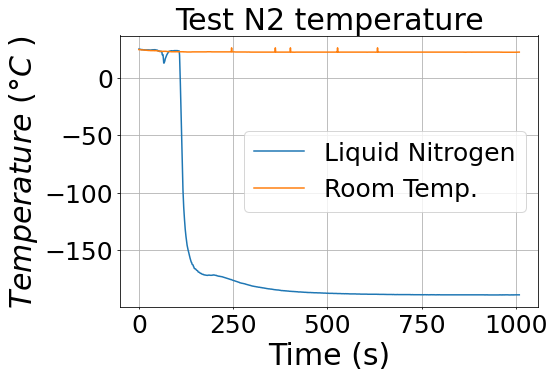

In [162]:
# need to remove rapidly changing data.
# plot it:
plt.figure(figsize=(7.5,5))
plt.plot(ti2,temp2,label='Liquid Nitrogen')
plt.plot(ti1,temp1,label='Room Temp.')
plt.xlabel('Time (s)',fontsize=30)
plt.ylabel(r'$Temperature\ (\degree C\ )$',fontsize=30)
plt.title('Test N2 temperature',fontsize=30)
plt.legend()

plt.grid()
plt.legend(fontsize=25)